In [1]:
import numpy as np
import pandas as pd

from cvxopt import solvers
solvers.options['show_progress'] = False

import sys
sys.path.append("../graph_signal_processing")

from graph_generator import line_graph, grid_graph, rbf_random_graph, er_random_graph
from graph_signal_generator import smooth_signal_generator
from gls_sig_rep import GLSigRep
from metrics import F1_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Generating smooth graphs

Le modèle du signal est:
$$ x = \mathcal{D}h + \epsilon$$
où $h$ est une variable latente, $\mathcal{D}$ est la matrice de représentation. Dans la suite, nous ferons l'hyptohèse que des informations sur la structure du graphe sont contenues dans cette matrice. En particulier, on peut supposer que D est un dictionnaire de motifs spectraux du graph. 

Dans la suite, nous allons nous intéresser aux processes de diffusion sur graphs. La matrice du Laplacien sera utilisée pour modéliser cette diffusion (cf equation de la chaleur). 
$$ D = \chi$$
avec un prior sur $h$, $h \approx \mathcal{N}(0, \Lambda^{-1})$ où $\chi$ est la matrice de vecteurs propres du laplacien du graph et $\Lambda$ un vecteur de ses valeurs propres.

# Learning graphs

In [2]:
n_samples = 1000 # number of signals simulated for each graph
n_steps = 100 # number of maximum steps 
n_trials = 20 # number of trials for each graph and each set of parameters

# hyperparameters for the grid search
alpha_ = np.logspace(-8, 1, 10)
beta_ = np.logspace(-8, 1, 10)
threshold_ = np.logspace(-3, -1, 3)

## Line graph

In [3]:
L = line_graph(16)

list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.
for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples = smooth_signal_generator(L, n_samples)
            pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=beta, alpha=alpha)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L, threshold=threshold)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
                
results_line = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
        

alpha : 1e-08; beta : 1e-08; threshold : 0.001 --> F1 = 0.4917939539035919
alpha : 1e-08; beta : 1e-07; threshold : 0.001 --> F1 = 0.7821217504800715
alpha : 1e-08; beta : 1e-06; threshold : 0.001 --> F1 = 1.0


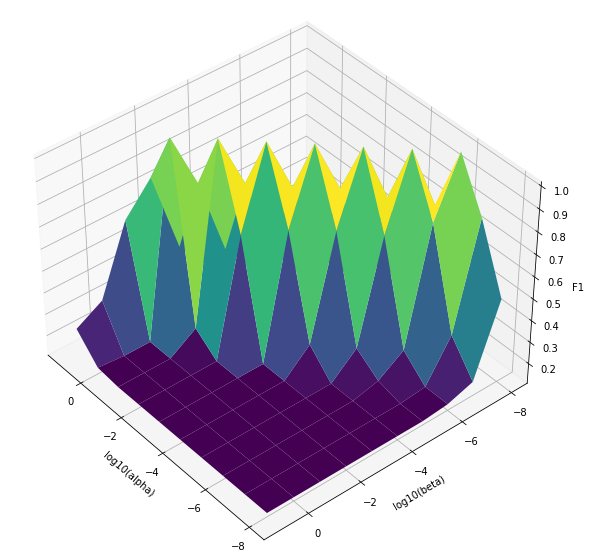

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
X = np.log(np.repeat(alpha_[np.newaxis, ], len(beta_), axis=0)) / np.log(10)
Y = np.log(np.repeat(beta_[np.newaxis, ], len(alpha_), axis=0).T) / np.log(10)
Z = results_line[results_line["threshold"] == 0.001]["F1"].values.reshape((len(beta_), len(alpha_)), order="C")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('log10(alpha)')
ax.set_ylabel('log10(beta)')
ax.set_zlabel('F1')
ax.view_init(40, 140)
plt.show()

In [5]:
alpha_6 = results_line[results_line["threshold"]==0.001][results_line["alpha"]==1e-6]["F1"]
alpha_4 = results_line[results_line["threshold"]==0.001][results_line["alpha"]==1e-4]["F1"]
alpha_2 = results_line[results_line["threshold"]==0.001][results_line["alpha"]==1e-2]["F1"]

<ipython-input-5-078ffa97b242>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alpha_6 = results_line[results_line["threshold"]==0.001][results_line["alpha"]==1e-6]["F1"]
<ipython-input-5-078ffa97b242>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alpha_4 = results_line[results_line["threshold"]==0.001][results_line["alpha"]==1e-4]["F1"]
<ipython-input-5-078ffa97b242>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alpha_2 = results_line[results_line["threshold"]==0.001][results_line["alpha"]==1e-2]["F1"]


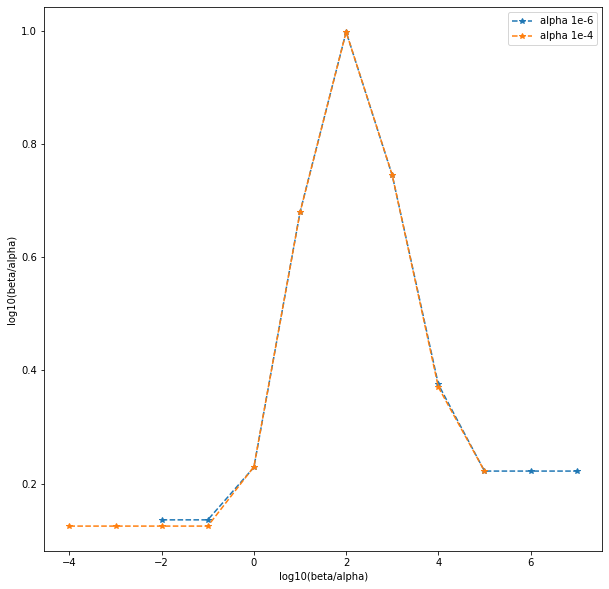

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(-2, 8), alpha_6, "*--", label="alpha 1e-6")
plt.plot(np.arange(-4, 6), alpha_4, "*--", label="alpha 1e-4")
plt.ylabel("log10(beta/alpha)")
plt.xlabel("log10(beta/alpha)")
plt.legend()

## Grid graph

In [13]:
L = grid_graph(16)

list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.
for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples = smooth_signal_generator(L, n_samples)
            pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=beta, alpha=alpha)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L, threshold=threshold)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
                
results_grid = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
        

alpha : 1e-08; beta : 1e-08; threshold : 0.001 --> F1 = 0.31898816484467213
alpha : 1e-08; beta : 1e-07; threshold : 0.001 --> F1 = 0.6068191870049453
alpha : 1e-08; beta : 1e-06; threshold : 0.001 --> F1 = 0.983927008908012


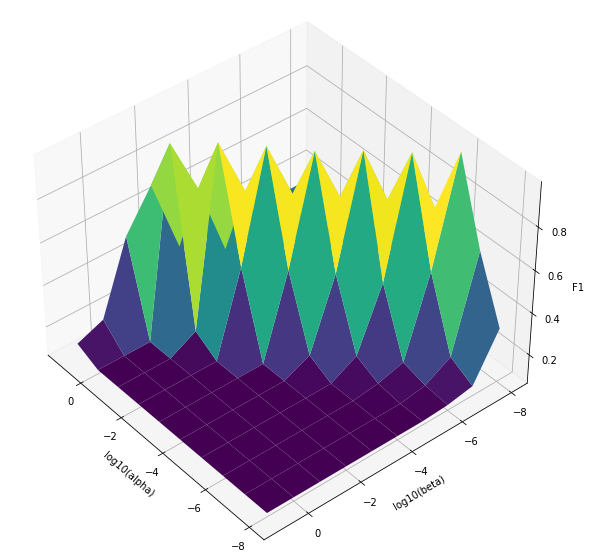

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
X = np.log(np.repeat(alpha_[np.newaxis, ], len(beta_), axis=0)) / np.log(10)
Y = np.log(np.repeat(beta_[np.newaxis, ], len(alpha_), axis=0).T) / np.log(10)
Z = results_grid[results_grid["threshold"] == 0.001]["F1"].values.reshape((len(beta_), len(alpha_)), order="C")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('log10(alpha)')
ax.set_ylabel('log10(beta)')
ax.set_zlabel('F1')
ax.view_init(40, 140)
plt.show()

In [15]:
results_grid[results_grid["F1"] > 0.95]

,alpha,beta,threshold,F1
6,1.000000e-08,0.000001,0.001,0.983927
7,1.000000e-08,0.000001,0.010,0.972741
39,1.000000e-07,0.000010,0.001,0.967431
40,1.000000e-07,0.000010,0.010,0.955066
72,1.000000e-06,0.000100,0.001,0.966022
73,1.000000e-06,0.000100,0.010,0.955926
105,1.000000e-05,0.001000,0.001,0.950876
138,1.000000e-04,0.010000,0.001,0.961680
139,1.000000e-04,0.010000,0.010,0.960570
171,1.000000e-03,0.100000,0.001,0.966074


## Rbf random graph

In [61]:
L = grid_graph(16)

list_alpha = []
list_beta = []
list_threshold = []
list_F1 = []

best = 0.
for alpha in alpha_:
    for beta in beta_:
        stats = [0] * len(threshold_)
        for _ in range(n_trials):
            samples = smooth_signal_generator(L, n_samples)
            pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=beta, alpha=alpha)
            for i, threshold in enumerate(threshold_):
                stats[i] += F1_score(L, pred_L)
        for i, threshold in enumerate(threshold_):
            list_alpha.append(alpha)
            list_beta.append(beta)
            list_threshold.append(threshold)
            F1 = stats[i] / n_trials
            list_F1.append(F1)
            if F1 > best:
                best = F1
                print("alpha : {0}; beta : {1}; threshold : {2} --> F1 = {3}".format(alpha, beta, threshold, F1))
                
results_rbf = pd.DataFrame({"alpha" : list_alpha, "beta" : list_beta, "threshold" : list_threshold, "F1" : list_F1})
        

alpha : 1e-08; beta : 1e-08; threshold : 0.001 --> F1 = 0.22124542124542126
alpha : 1e-08; beta : 1e-07; threshold : 0.001 --> F1 = 0.37721913236929927
alpha : 1e-08; beta : 1e-06; threshold : 0.001 --> F1 = 0.9075256391737685
alpha : 1e-06; beta : 0.0001; threshold : 0.001 --> F1 = 0.927837730183534


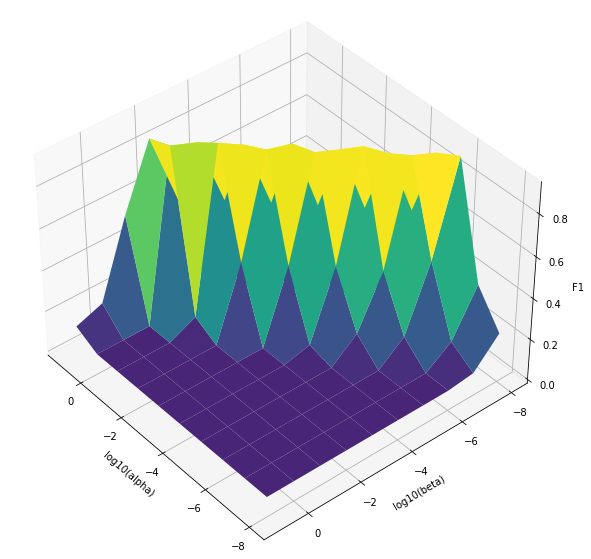

In [63]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
X = np.log(np.repeat(alpha_[np.newaxis, ], len(beta_), axis=0)) / np.log(10)
Y = np.log(np.repeat(beta_[np.newaxis, ], len(alpha_), axis=0).T) / np.log(10)
Z = results_rbf[results_rbf["threshold"] == 0.001]["F1"].values.reshape((len(beta_), len(alpha_)), order="C")
#ax.contour3D(X, Y, Z, 75, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('log10(alpha)')
ax.set_ylabel('log10(beta)')
ax.set_zlabel('F1')
ax.view_init(40, 140)
plt.show()

# Quelques visualisations

## Graphe ligne

In [27]:
L = line_graph(16)
samples = smooth_signal_generator(L, n_samples)
pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1e-4, alpha=1e-6)

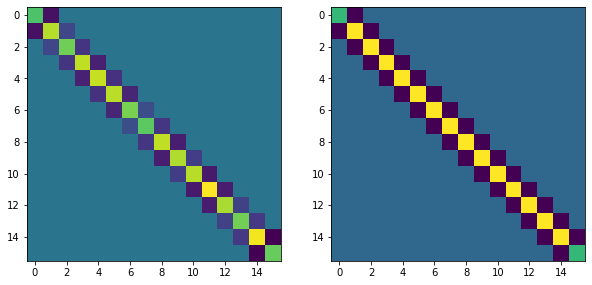

In [28]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(pred_L)
plt.subplot(1, 2, 2)
plt.imshow(L)

# Graphe grille

In [68]:
L = grid_graph(16)
samples = smooth_signal_generator(L, n_samples)
pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1e-3, alpha=1e-5)

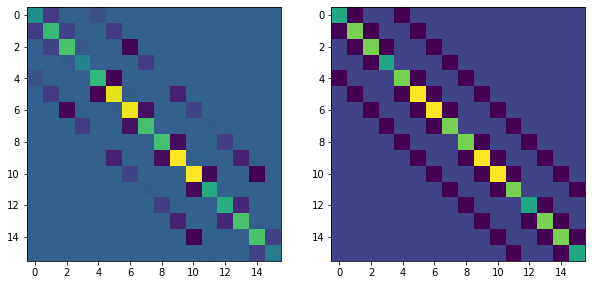

In [69]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(pred_L)
plt.subplot(1, 2, 2)
plt.imshow(L)

## Graphe RBF

In [71]:
L = rbf_random_graph(16)
samples = smooth_signal_generator(L, n_samples)
pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1e-4, alpha=1e-7)

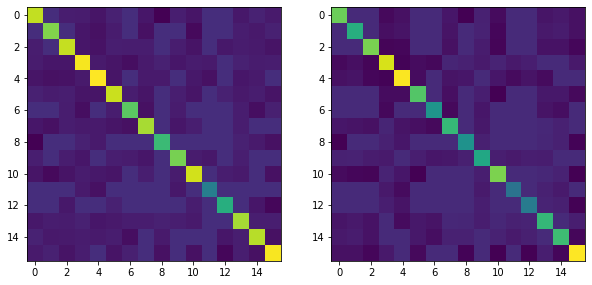

In [76]:
plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
pred_L_c = np.copy(pred_L)
pred_L_c[np.abs(pred_L) < 0.05] = 0
plt.imshow(pred_L_c)
plt.subplot(1, 2, 2)
plt.imshow(L)

# Influence du nombre de samples

In [16]:
list_num_samples = np.array([20, 50, 100, 150, 200, 250, 300, 400, 500, 750, 1000, 1250, 1500, 2000, 3000, 4000, 5000])

In [17]:
L = grid_graph(12)
list_F1_12 = [0] * len(list_num_samples)
best = 0.
for i, M in enumerate(list_num_samples):
    for _ in range(n_trials):
        samples = smooth_signal_generator(L, M)
        pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1e-1, alpha=1e-3)
        list_F1_12[i] += F1_score(L, pred_L, threshold=0.001) 
    list_F1_12[i] = list_F1_12[i] / n_trials
    if list_F1_12[i] > best:
        best = list_F1_12[i]
        print("num samples : {0} --> F1 = {1}".format(M, list_F1_12[i]))
results_grid = pd.DataFrame({"num_samples" : list_num_samples, "F1" : list_F1_12})     

num samples : 20 --> F1 = 0.30829170829170816
num samples : 50 --> F1 = 0.32310221701827246
num samples : 100 --> F1 = 0.36904893428436275
num samples : 150 --> F1 = 0.4038700213548564
num samples : 200 --> F1 = 0.4255563711008358
num samples : 250 --> F1 = 0.437313543426196
num samples : 300 --> F1 = 0.4420276750655695
num samples : 400 --> F1 = 0.45112242240761197


In [18]:
L = grid_graph(16)
list_F1_16 = [0] * len(list_num_samples)
best = 0.
for i, M in enumerate(list_num_samples):
    for _ in range(n_trials):
        samples = smooth_signal_generator(L, M)
        pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1e-1, alpha=1e-3)
        list_F1_16[i] += F1_score(L, pred_L, threshold=0.001) 
    list_F1_16[i] /= n_trials
    if list_F1_16[i] > best:
        best = list_F1_16[i]
        print("num samples : {0} --> F1 = {1}".format(M, list_F1_16[i]))
results_grid = pd.DataFrame({"num_samples" : list_num_samples, "F1" : list_F1_16})   

num samples : 20 --> F1 = 0.36725176054187003
num samples : 50 --> F1 = 0.4767579655017837
num samples : 100 --> F1 = 0.6283597366475436
num samples : 150 --> F1 = 0.7313975529776926
num samples : 200 --> F1 = 0.8177195238304039
num samples : 250 --> F1 = 0.8797349105451214
num samples : 300 --> F1 = 0.9044616674548329
num samples : 400 --> F1 = 0.9514790762458831
num samples : 500 --> F1 = 0.9744803878998407
num samples : 750 --> F1 = 0.9787158133373609


In [19]:
L = grid_graph(20)
list_F1_20 = [0] * len(list_num_samples)
best = 0.
for i, M in enumerate(list_num_samples):
    for _ in range(n_trials):
        samples = smooth_signal_generator(L, M)
        pred_L, _ = GLSigRep(samples, n_step=n_steps, beta=1e-1, alpha=1e-3)
        list_F1_20[i] += F1_score(L, pred_L, threshold=0.001) 
    list_F1_20[i] = list_F1_20[i] / n_trials
    if list_F1_20[i] > best:
        best = list_F1_20[i]
        print("num samples : {0} --> F1 = {1}".format(M, list_F1_20[i]))
results_grid = pd.DataFrame({"num_samples" : list_num_samples, "F1" : list_F1_20})     

num samples : 20 --> F1 = 0.2431629301127205
num samples : 50 --> F1 = 0.29400648357933806
num samples : 100 --> F1 = 0.35991878317698756
num samples : 150 --> F1 = 0.41476548551436193
num samples : 200 --> F1 = 0.46276661085571513
num samples : 250 --> F1 = 0.500193971976581
num samples : 300 --> F1 = 0.5144431967376653
num samples : 400 --> F1 = 0.5440877369081872
num samples : 500 --> F1 = 0.5751518245021209


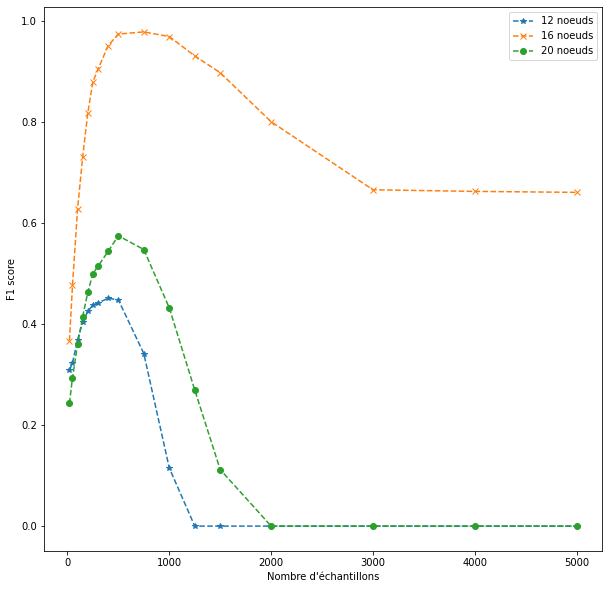

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(list_num_samples, list_F1_12, "*--", label="12 noeuds")
plt.plot(list_num_samples, list_F1_16, "x--", label="16 noeuds")
plt.plot(list_num_samples, list_F1_20, "o--", label="20 noeuds")
plt.xlabel("Nombre d'échantillons")
plt.ylabel("F1 score")
plt.legend()